In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

In [166]:
# Chargement du dataset des pinguoins
penguins = pd.read_csv('../csv/penguins_size.csv', sep=',')
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [167]:
# Définition des spécimens et de leurs caractéristiques
penguins.dropna(inplace=True)
species = penguins["species"]
features = penguins.iloc[:, 2:4]

# Split du dataset à 80% pour entrainement, 20% pour les tests
features_train, features_test, species_train, species_test= train_test_split(
    features, species,
    test_size=0.2,
    stratify=species,
    random_state=1)

# Instantiation d'un arbre de décision
dt = DecisionTreeClassifier(max_depth=1, random_state=1)

# Ajustement des données d'entrainement
dt.fit(features_train, species_train)

# Prédiction des spécimens avec 20% des données pour les tests
species_pred = dt.predict(features_test) 

# Evaluation de la précision des prédictions avec les valeurs des tests
print(accuracy_score(species_test, species_pred))

# culmens
x, y = penguins["culmen_length_mm"], penguins["culmen_depth_mm"]

0.7014925373134329


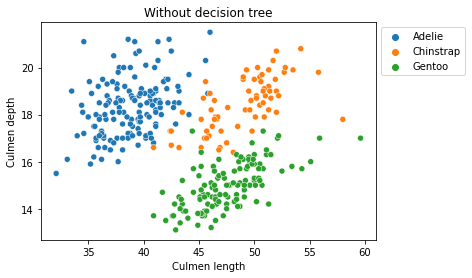

In [170]:
# Plot des Espèces sans arbre de décision
fig, ax = plt.subplots()
sns.scatterplot(
    data=penguins, 
    x=x, y=y, 
    hue="species", ax=ax)
ax.set_xlabel("Culmen length")
ax.set_ylabel("Culmen depth")
ax.set_title("Without decision tree")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

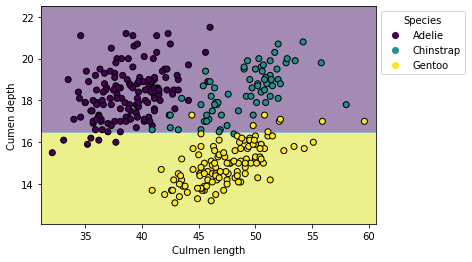

In [ ]:
# Plot des Espèces avec partition de l'arbre de décision
# Encodage des espèces
le = LabelEncoder()
penguins["species_encoded"] = le.fit_transform(penguins["species"])

disp = DecisionBoundaryDisplay.from_estimator(
    dt, features, 
    response_method="predict",
    xlabel="Culmen length", ylabel="Cumen depth",
    alpha=0.5
    )
scatter = disp.ax_.scatter(
    features.iloc[:, 0], features.iloc[:, 1], 
    c=penguins["species_encoded"], edgecolor="k")

legend_handles, legend_labels = scatter.legend_elements()
legend_labels = list(le.classes_)
legend1 = disp.ax_.legend(
    handles=legend_handles, labels=legend_labels, 
    title="Species",
    loc="upper left", bbox_to_anchor=(1,1))
plt.show()